In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST
import numpy as np

In [7]:
#Downloading the dataset:
data = MNIST(root = 'data/', download=True)

In [8]:
len(data)

60000

In [9]:
test_data = MNIST(root = 'data/', train = False)
len(test_data)

10000

In [10]:
data[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Label 0


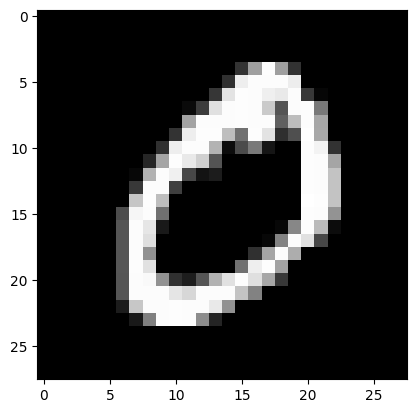

In [12]:
image, Label = data[1]
plt.imshow(image, cmap = 'gray')
print("Label", Label)

In [13]:
import torchvision.transforms as transforms

In [14]:
data = MNIST(root  = 'data/',
            train = True,
            transform = transforms.ToTensor())

In [15]:
len(data[0])

2

In [16]:
img_tensor, Label = data[0]
print(img_tensor.shape, Label)

torch.Size([1, 28, 28]) 5


In [17]:
print(img_tensor[:, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


In [18]:
from torch.utils.data import random_split

train_data, cv_data = random_split(data, [50000, 10000])
len(train_data), len(cv_data)

(50000, 10000)

In [19]:
from torch.utils.data import DataLoader
Batch_size = 128

train_Loader = DataLoader(train_data, Batch_size, shuffle = True)
cv_loader = DataLoader(cv_data, Batch_size)

In [67]:
cv_loader

In [20]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

#Logistic Regression model:
model = nn.Linear(input_size, num_classes)

In [21]:
print(model.weight.shape)

torch.Size([10, 784])


In [22]:
model.weight

Parameter containing:
tensor([[-0.0305, -0.0152,  0.0162,  ...,  0.0202,  0.0273, -0.0183],
        [ 0.0016,  0.0316,  0.0008,  ..., -0.0130,  0.0352,  0.0052],
        [ 0.0255, -0.0299,  0.0287,  ..., -0.0344, -0.0205, -0.0128],
        ...,
        [-0.0038, -0.0224, -0.0160,  ..., -0.0176,  0.0166, -0.0087],
        [ 0.0068,  0.0314,  0.0054,  ...,  0.0062,  0.0158, -0.0045],
        [ 0.0179, -0.0020, -0.0309,  ..., -0.0098,  0.0112, -0.0213]],
       requires_grad=True)

In [23]:
print(model.bias.shape)

torch.Size([10])


In [24]:
for images, labels in train_Loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break
    

tensor([9, 5, 6, 2, 4, 6, 8, 0, 7, 2, 0, 6, 8, 5, 7, 2, 7, 4, 1, 4, 9, 4, 6, 7,
        1, 3, 8, 2, 2, 6, 0, 3, 5, 9, 3, 8, 0, 0, 2, 2, 6, 7, 8, 0, 6, 7, 8, 0,
        8, 6, 8, 0, 8, 6, 0, 6, 9, 8, 2, 4, 7, 6, 7, 7, 8, 1, 8, 7, 0, 6, 3, 4,
        6, 8, 8, 9, 1, 0, 5, 9, 7, 9, 6, 7, 9, 0, 3, 5, 4, 0, 4, 7, 5, 9, 9, 6,
        4, 7, 2, 0, 5, 4, 6, 3, 8, 7, 0, 7, 5, 7, 6, 1, 5, 0, 3, 9, 2, 0, 0, 7,
        8, 8, 6, 9, 6, 3, 9, 4])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [25]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [26]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-1.0697e-02,  2.5643e-02, -2.6721e-02,  ..., -4.7795e-06,
          -2.9049e-02, -5.0266e-04],
         [-1.2058e-02, -4.1126e-03, -2.6467e-02,  ...,  1.3798e-02,
           2.9460e-02, -3.0146e-02],
         [-4.5284e-03, -3.2906e-02,  3.1346e-02,  ..., -1.2082e-02,
          -2.8127e-03, -8.6573e-03],
         ...,
         [ 3.6536e-03,  9.5160e-03,  2.7367e-02,  ..., -1.2293e-02,
           2.0249e-02,  1.7078e-02],
         [ 4.3949e-03,  3.0256e-02, -3.3532e-03,  ...,  1.7292e-02,
          -2.0095e-02, -2.8820e-02],
         [ 9.0213e-03, -1.7038e-02, -2.5234e-03,  ..., -1.3479e-03,
          -3.3045e-02, -1.3143e-02]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0018, -0.0042, -0.0044,  0.0016, -0.0072, -0.0144, -0.0269, -0.0251,
          0.0210,  0.0058], requires_grad=True)]

In [74]:
for images, labels in train_Loader:
    print("Shape of images: ", images.shape)
    outputs = model(images)
    break
    
print('Shape of output: ', outputs.shape)
print("Sample output :\n", outputs[:2].data )

Shape of images:  torch.Size([128, 1, 28, 28])
Shape of output:  torch.Size([128, 10])
Sample output :
 tensor([[-1.7999e-02,  2.7310e-01, -2.1254e-01, -2.1162e-01,  9.7678e-02,
          1.1115e-01,  6.7791e-02,  2.7002e-01, -3.0585e-01, -2.9658e-01],
        [-3.8995e-01,  3.4958e-02,  2.2289e-01, -2.1583e-01, -3.1278e-01,
          9.2296e-03,  4.5753e-02, -6.6014e-02, -5.7324e-01, -1.1555e-04]])


In [28]:
outputs[0]

tensor([ 0.0697,  0.3166,  0.0932, -0.2329, -0.0289, -0.2159, -0.1026, -0.1949,
         0.0709, -0.4217], grad_fn=<SelectBackward0>)

In [29]:
exps = torch.exp(outputs[0])

In [30]:
exps = exps / torch.sum(exps)

In [31]:
exps

tensor([0.1121, 0.1435, 0.1147, 0.0828, 0.1016, 0.0842, 0.0943, 0.0860, 0.1122,
        0.0686], grad_fn=<DivBackward0>)

In [32]:
torch.sum(exps)

tensor(1., grad_fn=<SumBackward0>)

In [33]:
#Apply softmax for each output row:
import torch.nn.functional as F

probs = F.softmax(outputs, dim = 1)

#Look at the sample probabilities:
print("Softmax Probs: \n", probs[:2].data)

#Add up the probabilities of an output row:
print("Sum: ", torch.sum(probs[0]).item())

Softmax Probs: 
 tensor([[0.1121, 0.1435, 0.1147, 0.0828, 0.1016, 0.0842, 0.0943, 0.0860, 0.1122,
         0.0686],
        [0.1160, 0.1123, 0.1060, 0.0984, 0.0760, 0.0766, 0.1069, 0.1080, 0.0957,
         0.1040]])
Sum:  1.0


In [34]:
max_prob, pred = torch.max(probs, dim = 1)

print(max_prob)
print(pred)

tensor([0.1435, 0.1160, 0.1295, 0.1233, 0.1140, 0.1491, 0.1378, 0.1381, 0.1467,
        0.1437, 0.1090, 0.1274, 0.1178, 0.1271, 0.1149, 0.1251, 0.1281, 0.1418,
        0.1310, 0.1707, 0.1499, 0.1181, 0.1243, 0.1726, 0.1340, 0.1363, 0.1214,
        0.1186, 0.1257, 0.1339, 0.1288, 0.1530, 0.1187, 0.1261, 0.1316, 0.1356,
        0.1269, 0.1413, 0.1206, 0.1325, 0.1566, 0.1242, 0.1410, 0.1275, 0.1478,
        0.1349, 0.1219, 0.1222, 0.1085, 0.1232, 0.1693, 0.1513, 0.1532, 0.1359,
        0.1426, 0.1287, 0.1181, 0.1568, 0.1166, 0.1223, 0.1286, 0.1388, 0.1271,
        0.1509, 0.1759, 0.1209, 0.1270, 0.1369, 0.1355, 0.1183, 0.1182, 0.1477,
        0.1281, 0.1235, 0.1249, 0.1647, 0.1118, 0.1526, 0.1445, 0.1471, 0.1480,
        0.1289, 0.1267, 0.1540, 0.1140, 0.1905, 0.1263, 0.1408, 0.1333, 0.1650,
        0.1318, 0.1293, 0.1129, 0.1262, 0.1239, 0.1266, 0.1347, 0.1335, 0.1275,
        0.1309, 0.1433, 0.1388, 0.1176, 0.1402, 0.1223, 0.1542, 0.1597, 0.1467,
        0.1306, 0.1438, 0.1151, 0.1408, 

In [35]:
labels

tensor([8, 4, 6, 9, 3, 4, 7, 7, 0, 2, 3, 5, 2, 1, 3, 3, 8, 8, 4, 0, 6, 2, 1, 0,
        2, 0, 2, 4, 2, 2, 2, 8, 7, 3, 7, 2, 6, 0, 3, 7, 0, 2, 5, 1, 4, 4, 2, 9,
        4, 1, 0, 0, 4, 2, 9, 1, 3, 8, 5, 7, 1, 4, 7, 0, 4, 6, 4, 1, 4, 8, 2, 0,
        5, 4, 7, 0, 3, 0, 4, 7, 3, 1, 6, 6, 9, 0, 9, 2, 3, 9, 2, 5, 2, 3, 5, 8,
        8, 1, 7, 4, 4, 0, 2, 9, 9, 6, 0, 9, 6, 6, 2, 6, 2, 7, 7, 3, 0, 0, 3, 6,
        5, 5, 9, 9, 2, 0, 4, 9])

In [56]:
images.shape

torch.Size([128, 1, 28, 28])

In [36]:
def accuracy_fn(outputs, labels):
    _, preds = torch.max(outputs, dim = 1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [37]:
accuracy = accuracy_fn(outputs, labels) * 100
accuracy

tensor(2.3438)

In [38]:
loss_fn = F.cross_entropy

In [39]:
loss = loss_fn(outputs, labels)
print(loss)


tensor(2.3415, grad_fn=<NllLossBackward0>)


In [119]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss

    def cv_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy_fn(out, labels) * 100
        return {'cv_loss' : loss, 'cv_acc' : acc}

    def cv_epoch_end(self, outputs):
        batchlosses = [x['cv_loss'] for x in outputs]
        epochloss = torch.stack(batchlosses).mean()

        batchaccs = [x['cv_acc'] for x in outputs]
        epochaccs = torch.stack(batchaccs).mean()

        return {'cv_loss' : epochloss.item(), 'cv_acc' : epochaccs.item()}

    def epoch_end(self, epoch, result):
        print("Epoch[{}], cv_loss: {:.4f}, cv_acc: {:.4f}".format(epoch, result['cv_loss'], result['cv_acc']))

model = MnistModel()


In [120]:
def evaluate(model, cv_loader):
    outputs = [model.cv_step(batch) for batch in cv_loader]
    return model.cv_epoch_end(outputs)

def fit(epochs, lr, model, train_Loader, cv_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_Loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, cv_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history


In [121]:
result = evaluate(model, cv_loader)

In [122]:
result

{'cv_loss': 2.332798719406128, 'cv_acc': 8.969541549682617}

In [123]:
h1 = fit(5, 0.01, model, train_Loader, cv_loader)

Epoch[0], cv_loss: 0.8967, cv_acc: 82.7037
Epoch[1], cv_loss: 0.6744, cv_acc: 85.1760
Epoch[2], cv_loss: 0.5848, cv_acc: 86.1452
Epoch[3], cv_loss: 0.5342, cv_acc: 87.0352
Epoch[4], cv_loss: 0.5013, cv_acc: 87.5593


Text(0.5, 1.0, 'Accuracy vs No. of Epochs')

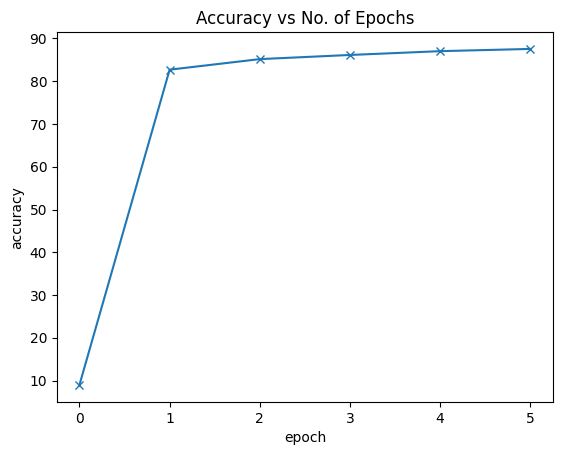

In [124]:
history = [result] + h1

accuracies = [result['cv_acc'] for result in history]

plt.plot(accuracies,'-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs No. of Epochs')

Shape:  torch.Size([1, 28, 28])
Label:  2


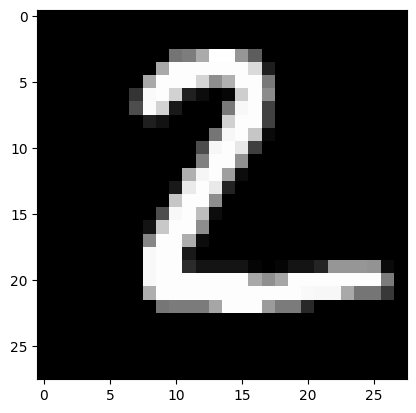

In [131]:
test_data = MNIST(root = 'data/', train = False, transform = transforms.ToTensor())

img, label = test_data[1]
plt.imshow(img[0], cmap = 'gray')
print('Shape: ', img.shape)
print('Label: ', label)

In [132]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim = 1)
    return preds[0].item()

In [137]:
print('Original Label: ', label, '\nPredicted label: ', predict_image(img, model))

Original Label:  2 
Predicted label:  2


In [144]:
test_loader = DataLoader(test_data, batch_size = 256)
result = evaluate(model, test_loader)
result

{'cv_loss': 0.4677812159061432, 'cv_acc': 88.134765625}

In [145]:
torch.save(model.state_dict(), 'mnist_log.pth')

In [146]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist_log.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0050,  0.0062,  0.0042,  ...,  0.0078, -0.0302, -0.0014],
                      [ 0.0222, -0.0040,  0.0269,  ..., -0.0149, -0.0015, -0.0312],
                      [-0.0295,  0.0322,  0.0338,  ..., -0.0083, -0.0311, -0.0149],
                      ...,
                      [ 0.0334, -0.0281,  0.0244,  ..., -0.0180,  0.0337, -0.0038],
                      [ 0.0025, -0.0195, -0.0139,  ..., -0.0039, -0.0208,  0.0271],
                      [ 0.0128,  0.0016,  0.0296,  ...,  0.0163, -0.0272, -0.0187]])),
             ('linear.bias',
              tensor([-0.0941,  0.1281, -0.0067, -0.0522,  0.0126,  0.1020, -0.0323,  0.0552,
                      -0.1850, -0.0619]))])

In [147]:
test_loader = DataLoader(test_data, batch_size = 256)
result = evaluate(model2, test_loader)
result

{'cv_loss': 0.4677812159061432, 'cv_acc': 88.134765625}